In [1]:
import os
os.chdir ('/projects/bbhj/asinha15/VLQ-NN-Reweighting/main')

In [2]:
import numpy as np
import sklearn
import shap
import time
import torch
import pandas as pd
from Data import CSVData
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [4]:
features = ['mode',
'Msim',
'Gsim',
'weight',
'pz_in1',
'pid_in1', 
'pz_in2',
'pid_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'pid_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'pid_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'pid_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'pid_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']

In [6]:
model_path = '/projects/bbhj/asinha15/VLQ-NN-Reweighting/main/trained_models/model_scripted7.pt'
model = torch.jit.load(model_path).to(device)
model.eval()

RecursiveScriptModule(
  original_name=Sequential
  (Linear0): RecursiveScriptModule(original_name=Linear)
  (Activation0): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear1): RecursiveScriptModule(original_name=Linear)
  (Activation1): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear2): RecursiveScriptModule(original_name=Linear)
  (Activation2): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear_last): RecursiveScriptModule(original_name=Linear)
)

In [7]:
def f(X):
    inputs = torch.Tensor(X).to(device)
    with torch.no_grad():
        outputs = model(inputs).to('cpu').numpy().flatten()
    return outputs

In [10]:
train_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['/projects/bbhj/asinha15/train_' + str(i)+'.csv' for i in range(0,10)])

In [11]:
X, Y = train_data.load_data_many()
X = pd.DataFrame(np.array(X))
Y = Y.flatten()
X.columns = features

In [12]:
shap.initjs()

explainer = shap.SamplingExplainer(f, X.sample(n=100))
shap_values = explainer.shap_values(X.iloc[299,:])
shap.force_plot(explainer.expected_value, shap_values, X.iloc[299,:])

In [13]:
import warnings

warnings.filterwarnings('ignore')

In [14]:
X_subset=X.sample(n=2000) #finding the shap values for 2000 events
shap_values2000 = explainer.shap_values(X_subset, np_samples=50)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [15]:
warnings.filterwarnings('default')

In [16]:
#shap.force_plot(explainer.expected_value, shap_values2000, X_subset)

In [17]:
X_subset = X_subset.reset_index()

In [18]:
del X_subset['index']

In [19]:
X_subset

,mode,Msim,Gsim,weight,pz_in1,pid_in1,pz_in2,pid_in2,px_out1,py_out1,...,pz_out3,e_out3,pid_out3,px_out4,py_out4,pz_out4,e_out4,pid_out4,Mtarget,Gtarget
0,0.0,1500.0,375.0,0.052368,1937.218789,2.0,-1576.064733,21.0,18.521453,8.412904,...,1215.667494,1468.236720,6.0,403.538191,113.596211,-773.761453,880.043208,-5.0,1600.0,320.0
1,-1.0,2100.0,1050.0,0.011944,1015.686905,21.0,-1891.973920,1.0,-19.088188,9.920623,...,507.573995,969.581107,-5.0,31.073177,103.031107,87.611581,138.848228,5.0,1900.0,95.0
2,1.0,1500.0,375.0,0.030697,2960.269011,21.0,-3214.115987,2.0,77.112834,-25.584770,...,1266.978960,1381.904399,6.0,248.419568,-383.829466,1592.790864,1657.118634,-5.0,1700.0,340.0
3,1.0,1700.0,425.0,0.014262,1115.952225,3.0,-356.608726,21.0,-42.834525,-38.509528,...,-74.212730,434.700062,-6.0,17.189747,3.266512,-19.843507,26.870286,5.0,1700.0,170.0
4,-1.0,1700.0,850.0,0.048477,2493.846931,2.0,-767.516454,21.0,50.443654,12.403904,...,-45.639234,754.563351,5.0,271.014062,297.543665,63.693267,407.504327,-5.0,1600.0,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.0,1500.0,750.0,0.106466,2194.049737,-2.0,-249.012651,21.0,-42.354078,-31.612293,...,-138.267624,168.929299,-5.0,14.396998,-1.982792,-86.778138,88.112089,5.0,1400.0,420.0
1996,0.0,2300.0,1150.0,0.016461,389.287731,21.0,-2710.362868,2.0,-176.276718,-284.433665,...,104.624194,339.234240,6.0,4.243165,-2.084363,126.136959,126.312990,-5.0,2200.0,660.0
1997,1.0,2300.0,575.0,0.001879,2266.614553,2.0,-1130.695680,21.0,-71.261260,-4.421291,...,557.305697,1421.796132,6.0,-9.170409,-11.083046,-0.056560,15.133522,-5.0,2200.0,110.0
1998,0.0,1300.0,650.0,0.219606,54.481203,21.0,-2540.419686,2.0,-30.044298,0.880850,...,-330.002489,387.627778,6.0,7.341903,-5.563647,17.509475,20.335423,-5.0,1200.0,540.0


In [20]:
X_subset.shape

(2000, 30)

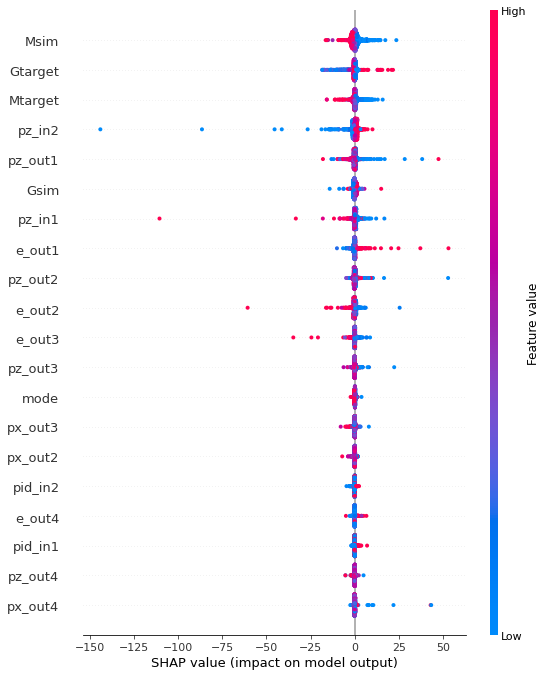

In [21]:
shap.summary_plot(shap_values2000, X_subset)

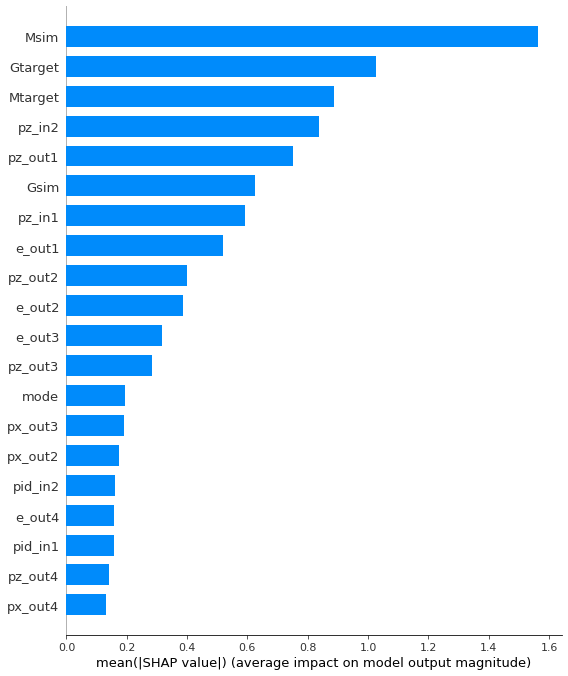

In [22]:
shap.summary_plot(shap_values2000, X_subset, plot_type='bar')

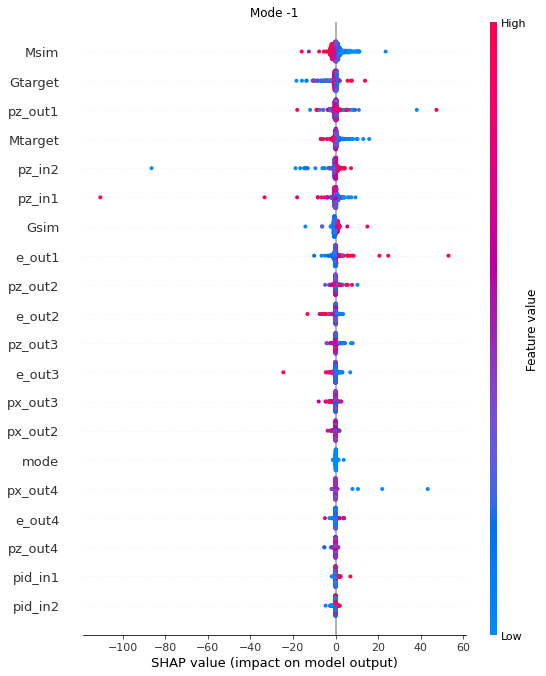

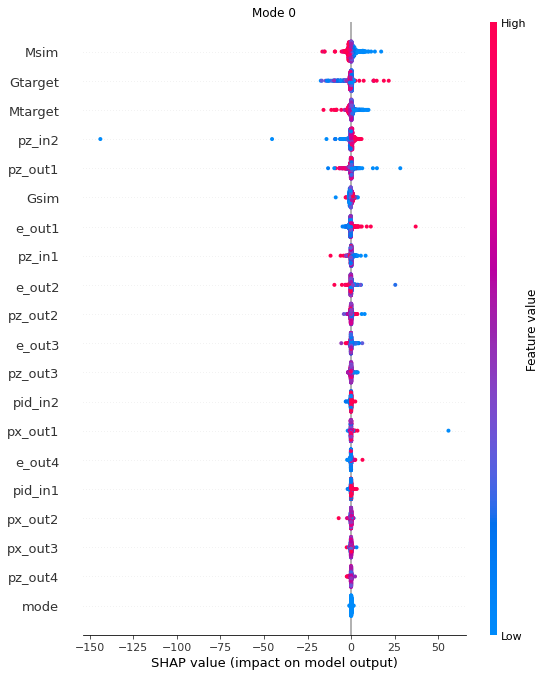

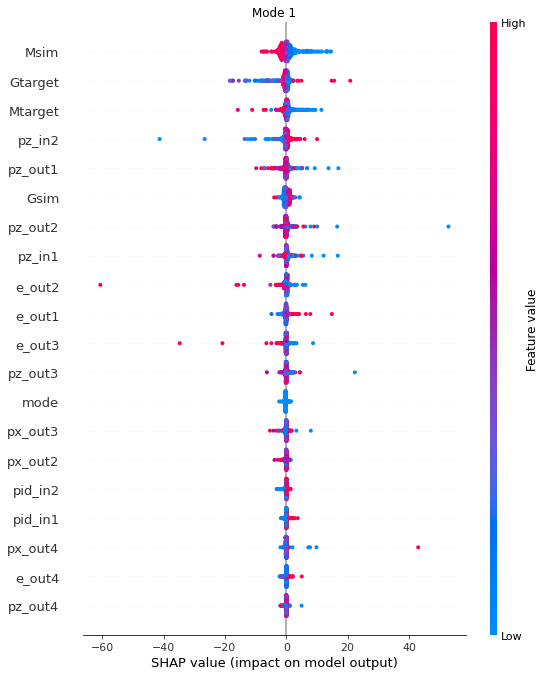

In [23]:
modes = [-1,0,1]
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

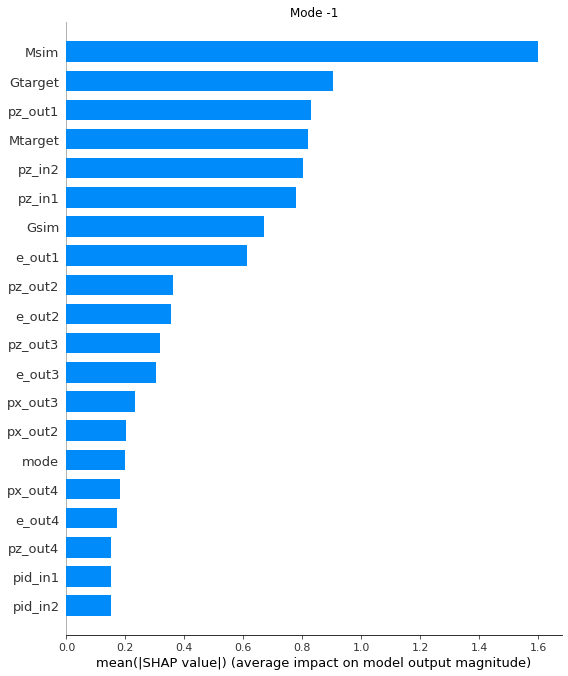

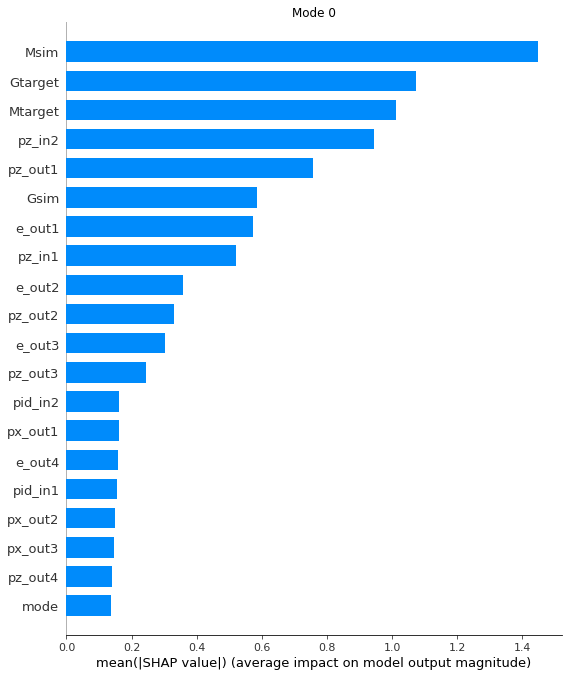

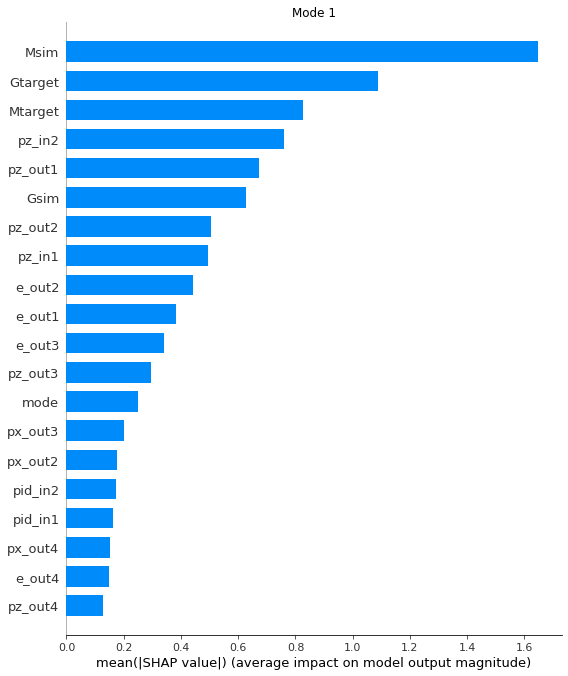

In [24]:
for i, b in enumerate(modes):
    plt.title(f"Mode {b}")
    idx = X_subset.index[X_subset['mode']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

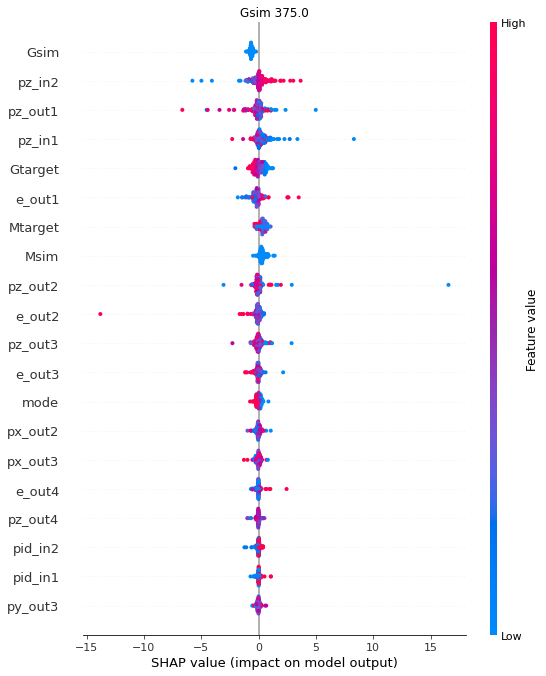

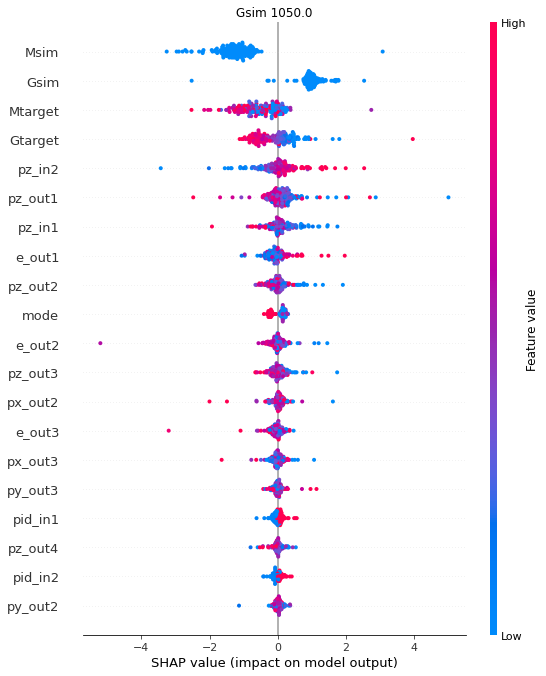

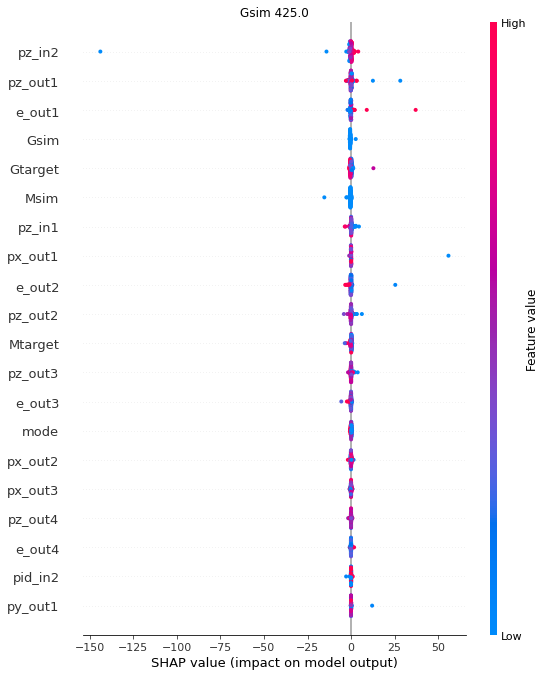

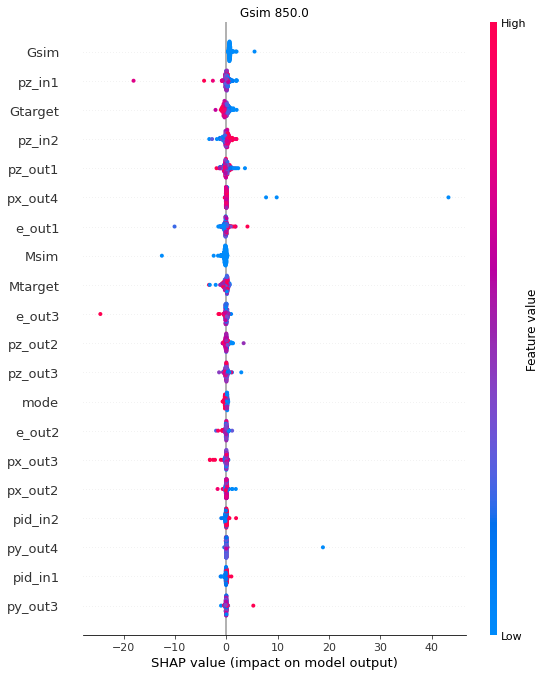

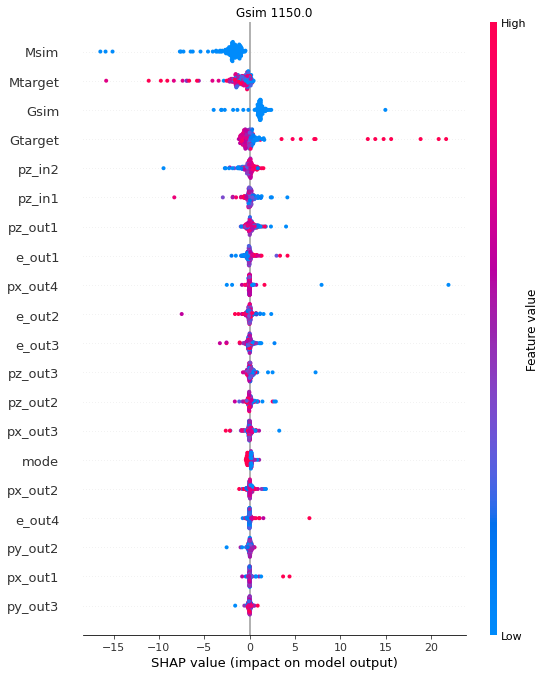

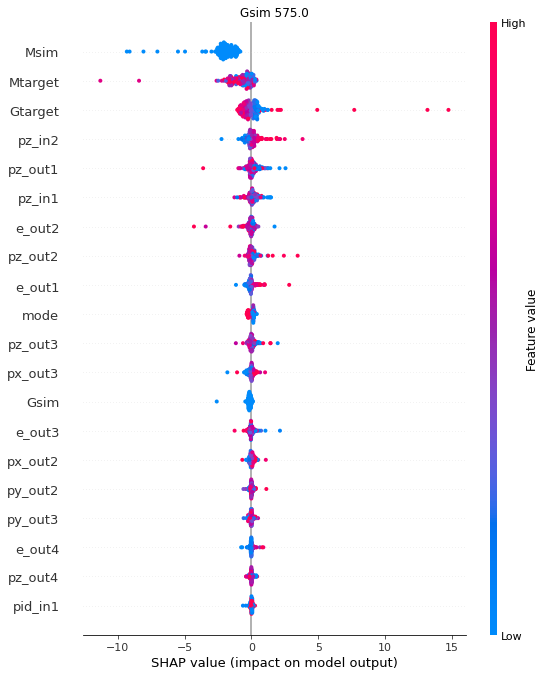

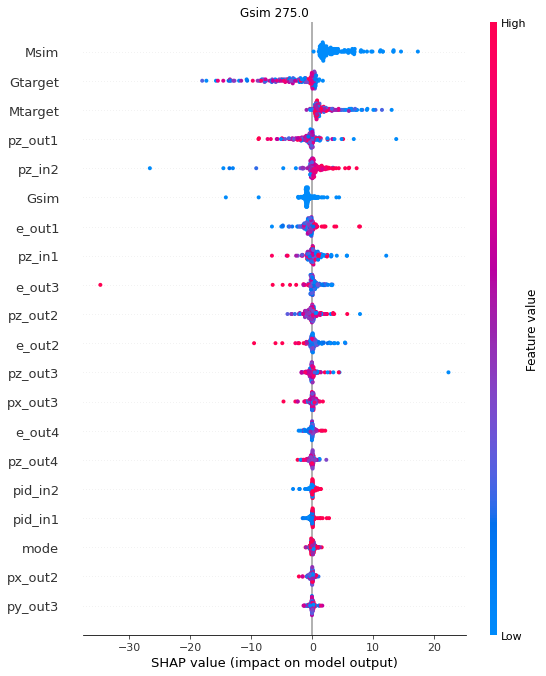

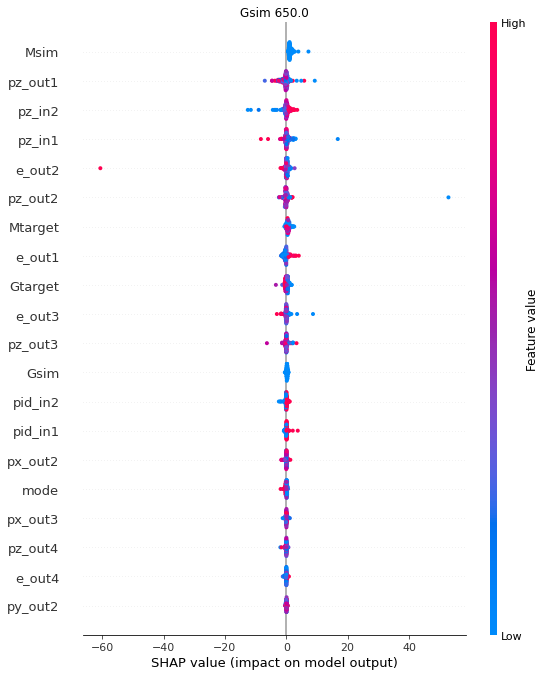

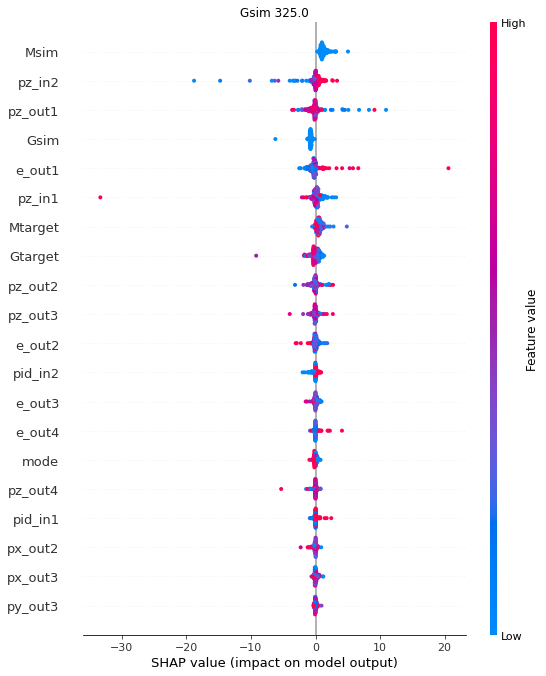

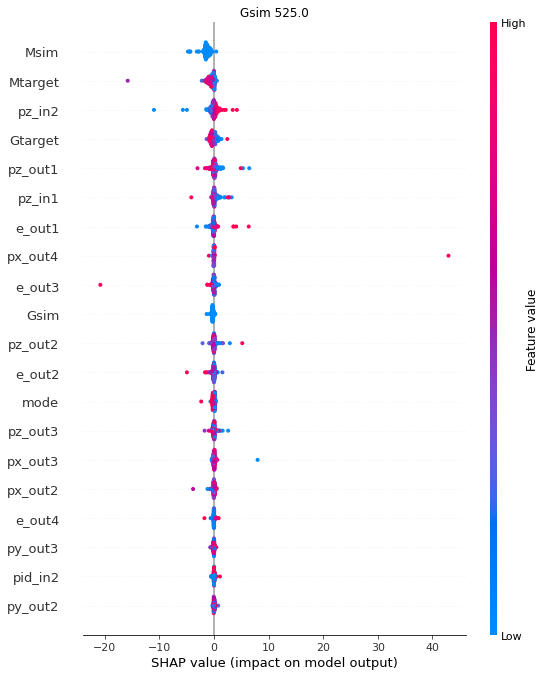

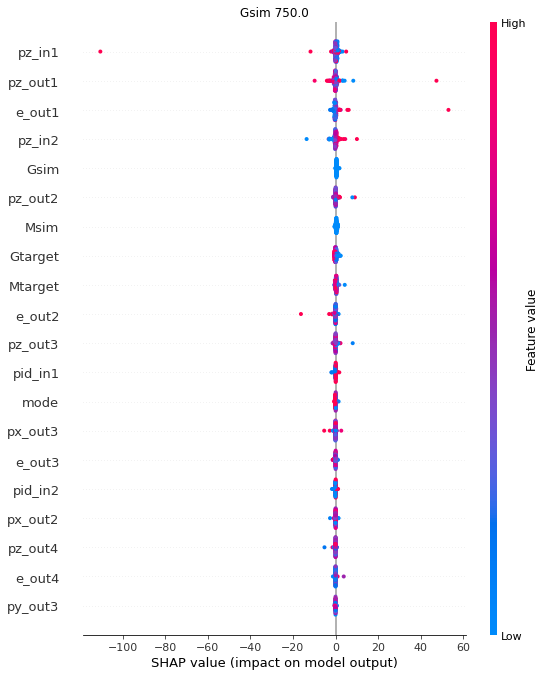

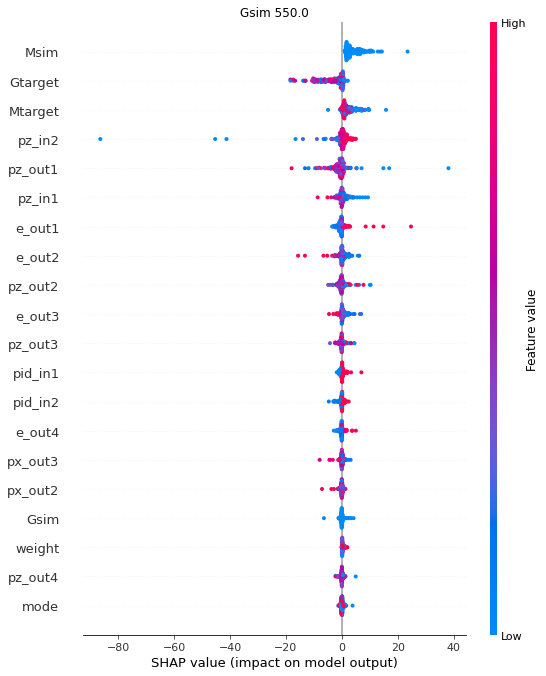

In [25]:
Gsims = X_subset.Gsim.unique()
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset)
    del X_subsubset

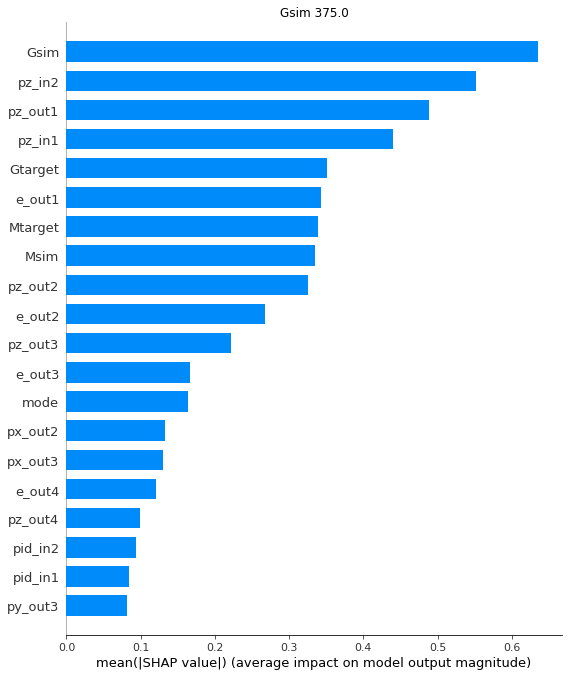

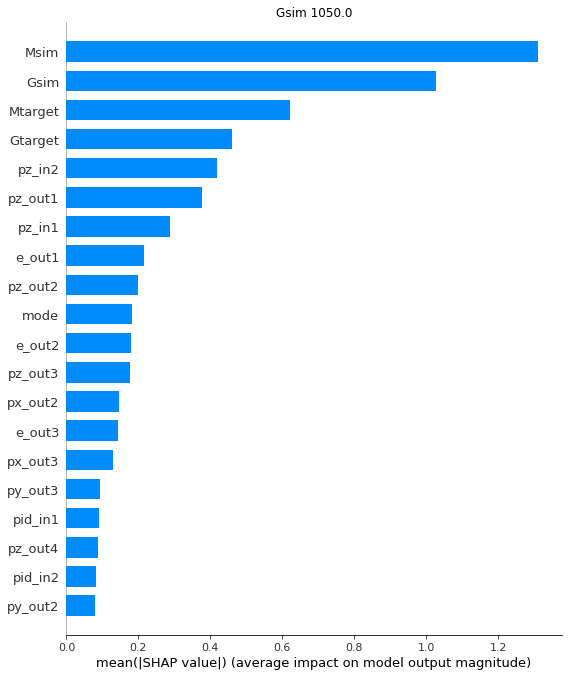

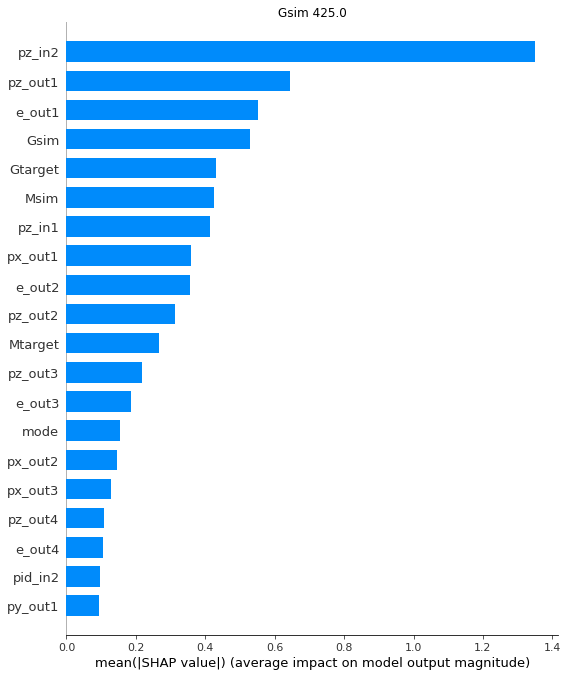

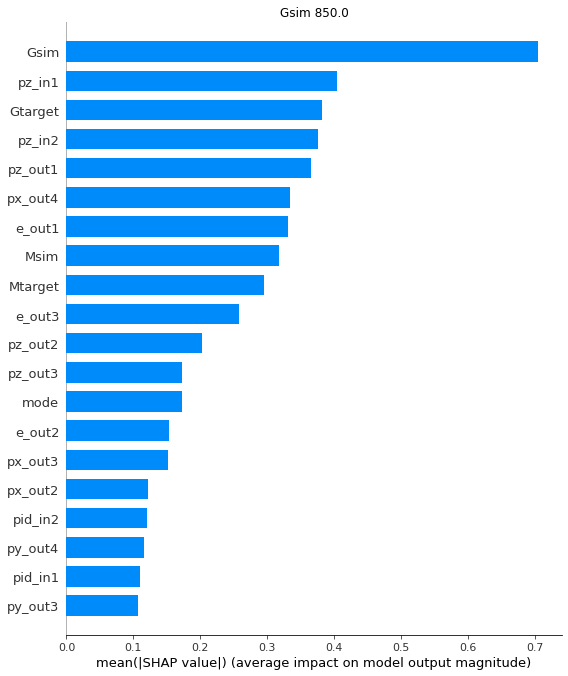

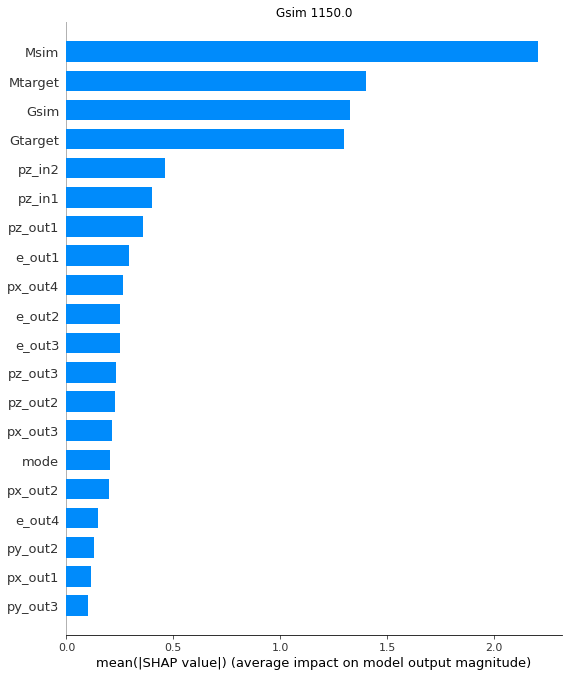

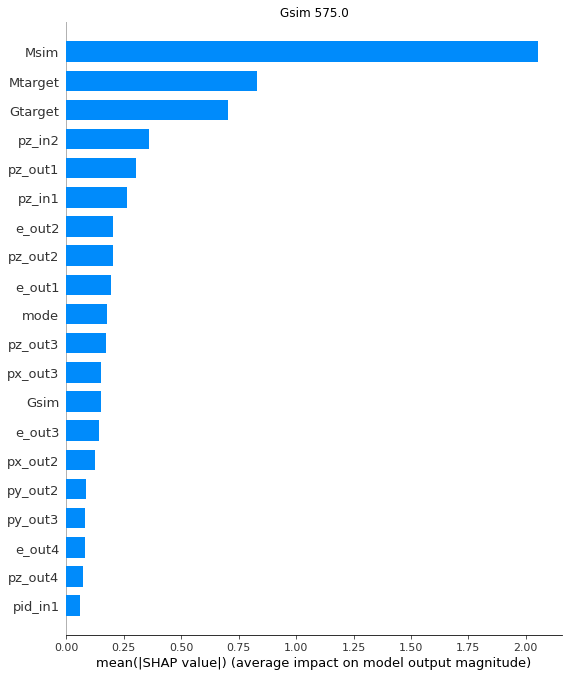

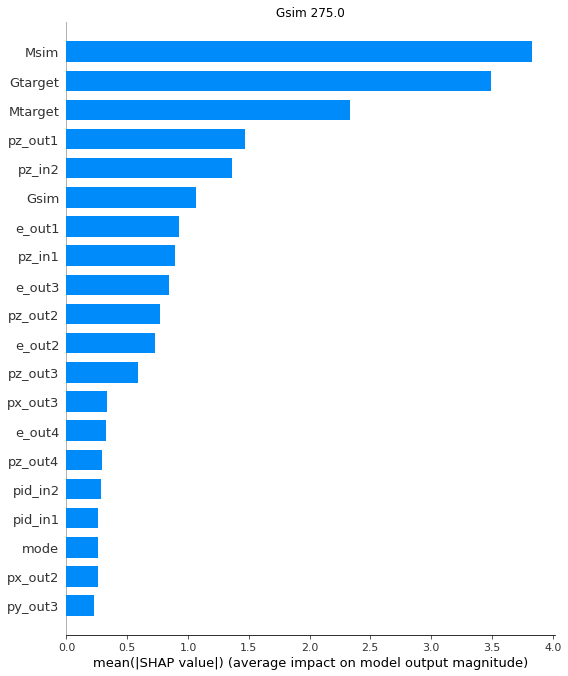

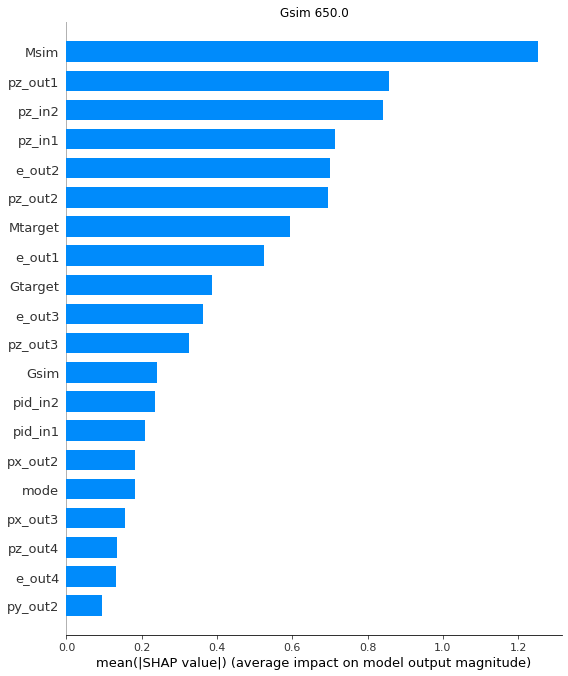

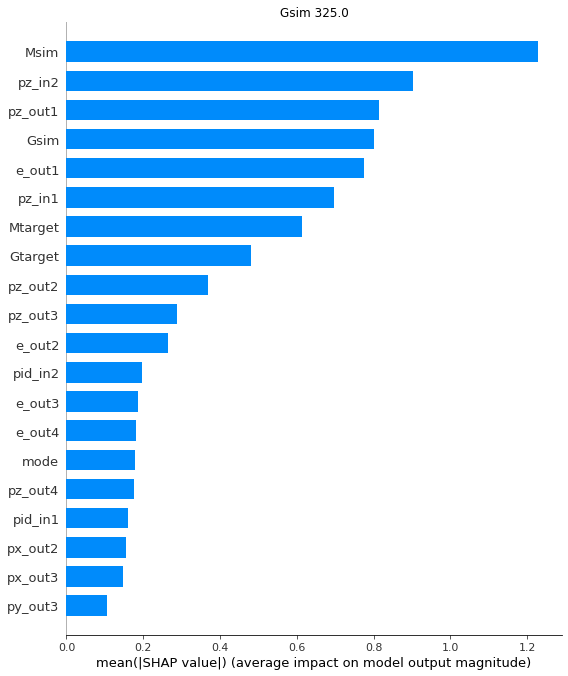

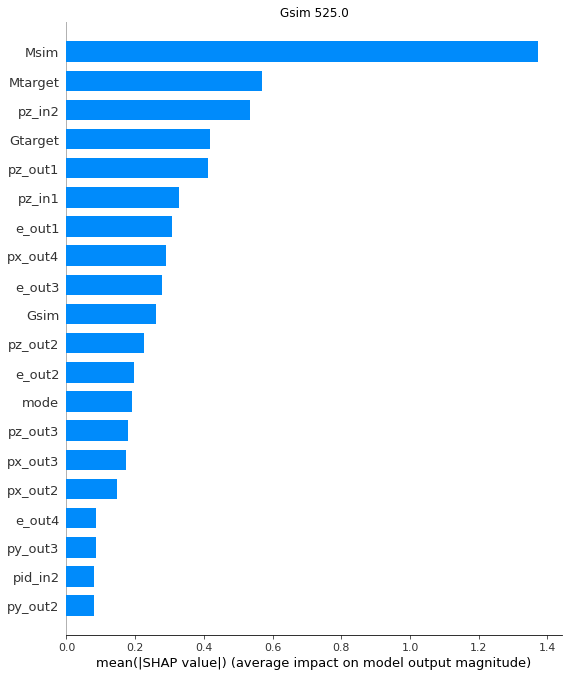

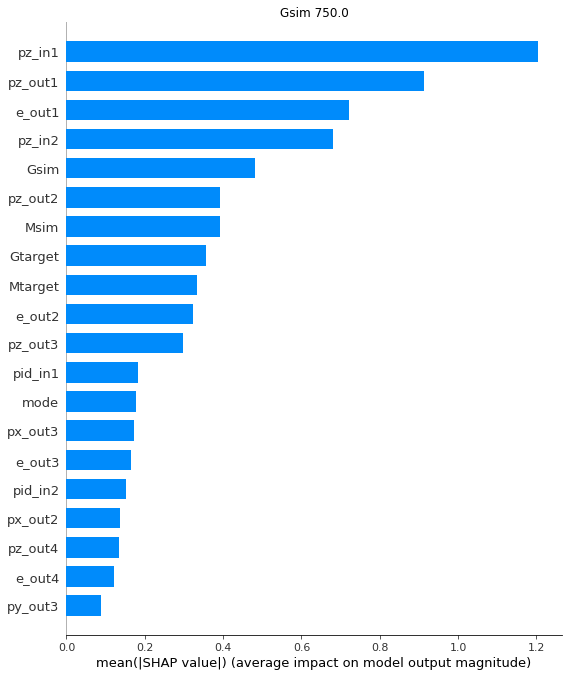

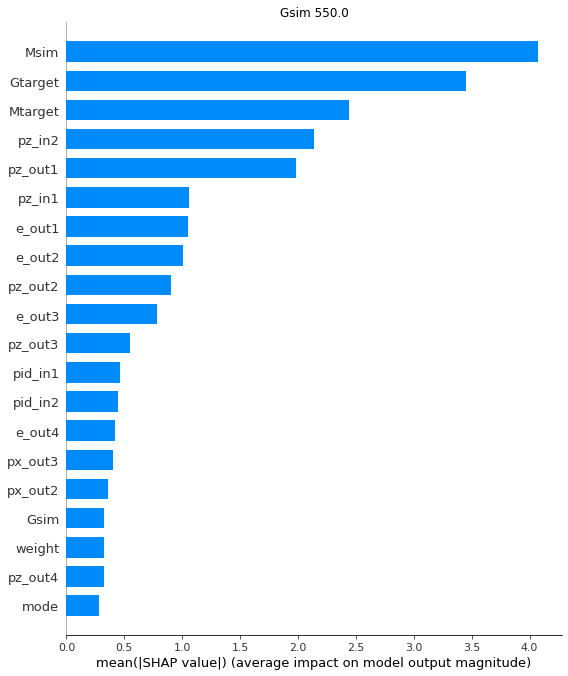

In [26]:
for i, b in enumerate(Gsims):
    plt.title(f"Gsim {b}")
    idx = X_subset.index[X_subset['Gsim']==b].tolist()
    X_subsubset = pd.DataFrame([X_subset.iloc[idxi,:] for idxi in idx])
    shap.summary_plot(np.array([shap_values2000[idxi,:] for idxi in idx]), X_subsubset, plot_type='bar')
    del X_subsubset

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

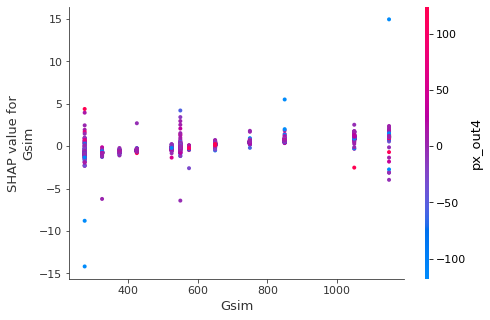

In [27]:
shap.dependence_plot('Gsim', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

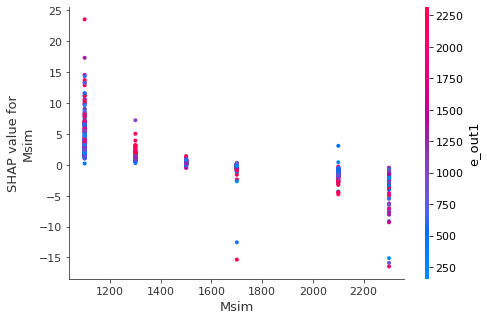

In [28]:
shap.dependence_plot('Msim', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

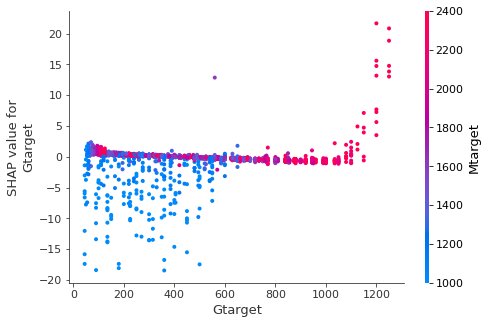

In [29]:
shap.dependence_plot('Gtarget', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

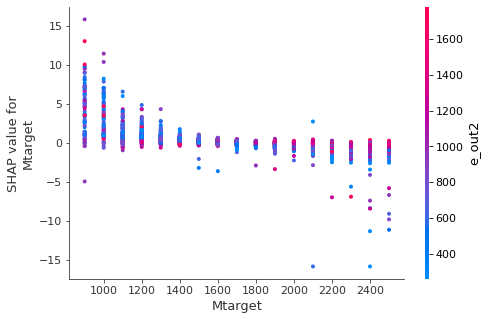

In [30]:
shap.dependence_plot('Mtarget', shap_values2000, X_subset)

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

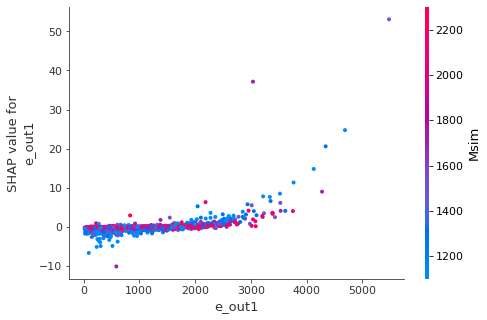

In [31]:
shap.dependence_plot('e_out1', shap_values2000, X_subset)